In [46]:
# from google.colab import drive
# drive.mount('/content/drive')
# a
# !unzip /content/drive/MyDrive/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
unzip:  cannot find or open /content/drive/MyDrive/dataset, /content/drive/MyDrive/dataset.zip or /content/drive/MyDrive/dataset.ZIP.


In [47]:
import numpy as np

import random

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset
from torchvision import transforms

import sklearn
from sklearn.neighbors import NearestNeighbors

from PIL import Image

### **Feature Extractor** 

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.to(device)
model.eval()

### **Prepare data**

In [ ]:
num_samples = 9605

image_embeddings = torch.tensor([])

transform = transforms.Compose([
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])



for index in range(num_samples):
    image = Image.open(f'/content/drive/MyDrive/dataset/{str(index).zfill(4)}.png')

    if image.mode != 'RGB':
        image = Image.merge('RGB', (image, image, image))

    image = transform(image)
    image = image.unsqueeze(0)
    image = image.to(device)

    with torch.no_grad():
        image_embedding = model.forward(image)

    image_embeddings = torch.cat((image_embeddings, image_embedding))

    if (index + 1) % 1000 == 0:
        print(f'{index + 1} images read')

### **KNN**

In [50]:
X = image_embeddings.cpu().numpy()

knn = NearestNeighbors(n_neighbors=7, metric='euclidean')

knn.fit(X)

distances, indices = knn.kneighbors(X)

### **Results**

In [51]:
def give_image(image_name):
    image = Image.open(f'/content/drive/MyDrive/dataset/{image_name}.png')
    return torch.tensor(np.array(image))

In [52]:
num_samples = 10

random_sample = [random.randint(0, len(image_embeddings)) for _ in range(num_samples)]
print(random_sample)

[1347, 536, 523, 306, 987, 996, 45, 427, 538, 825]


sample 1


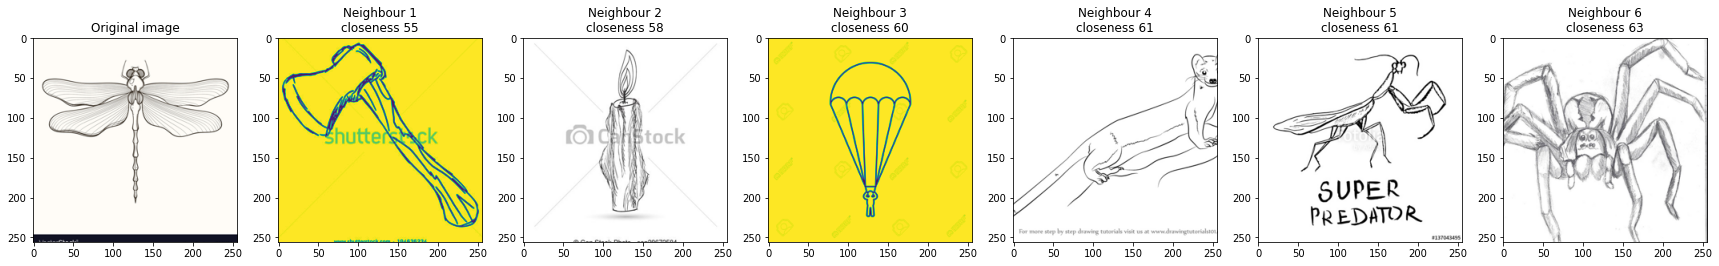

sample 2


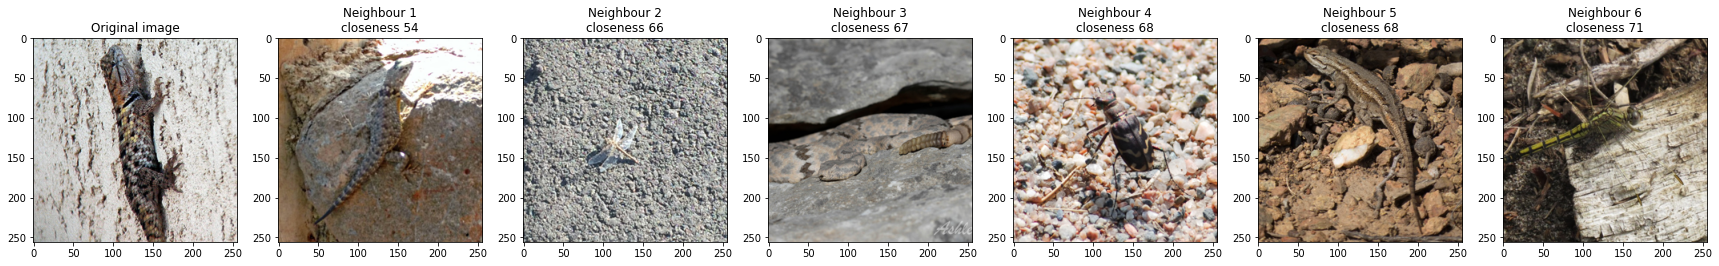

sample 3


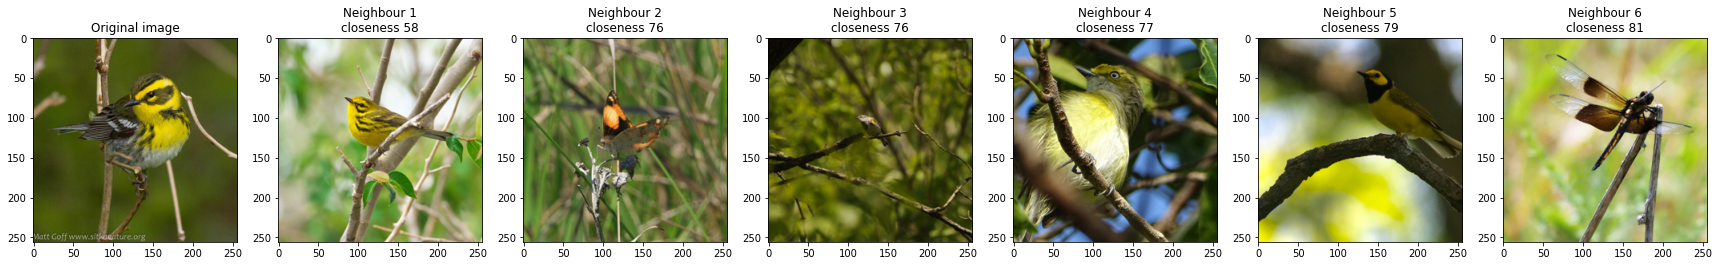

sample 4


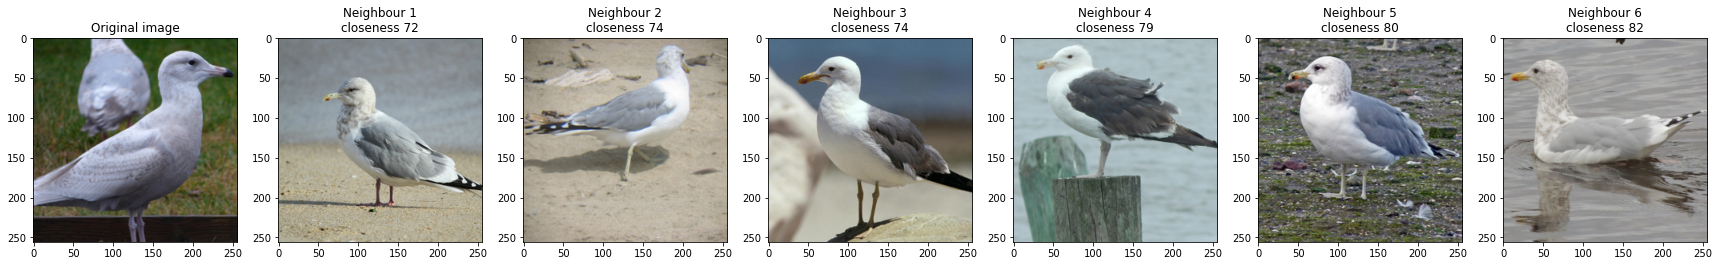

sample 5


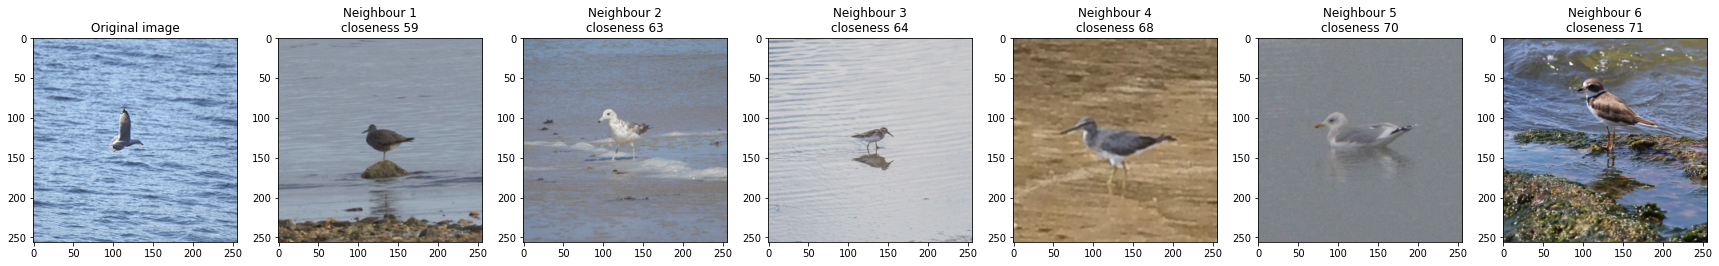

sample 6


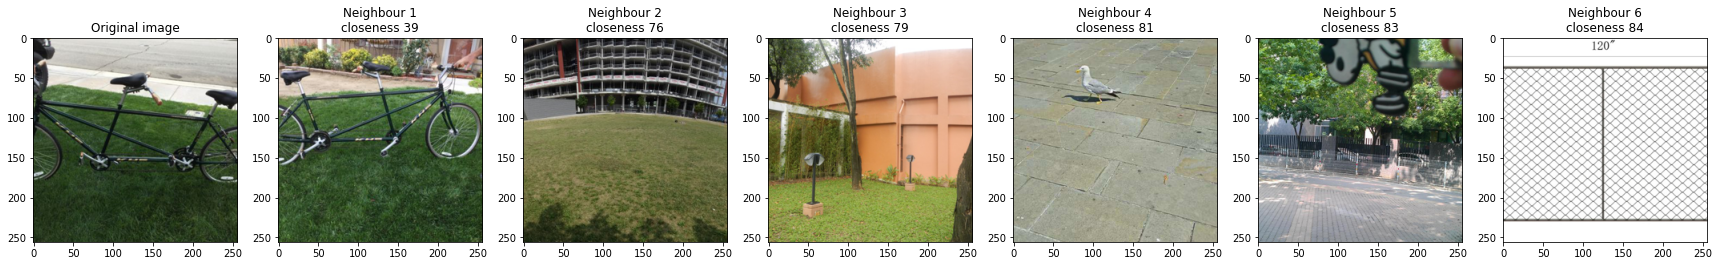

sample 7


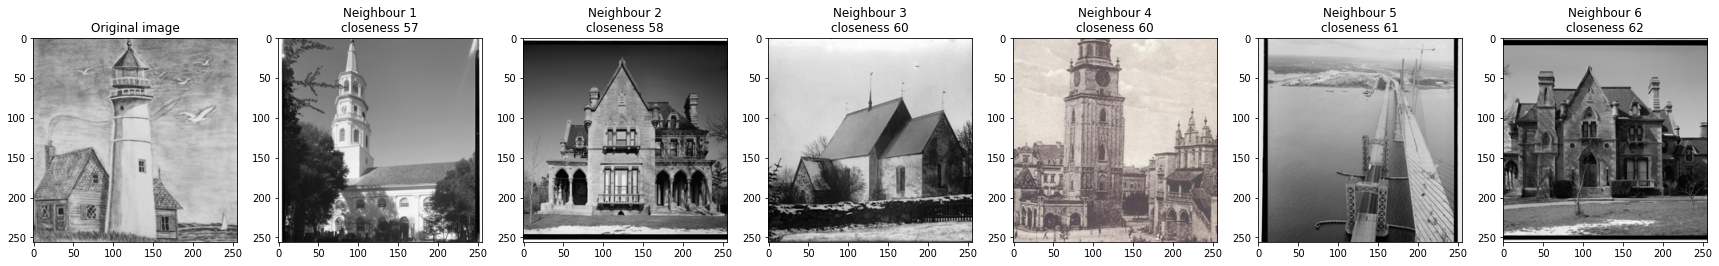

sample 8


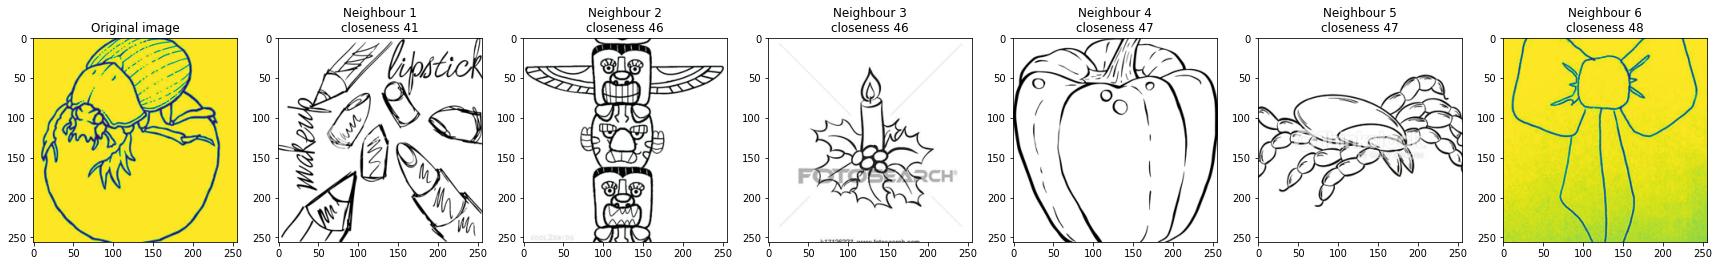

sample 9


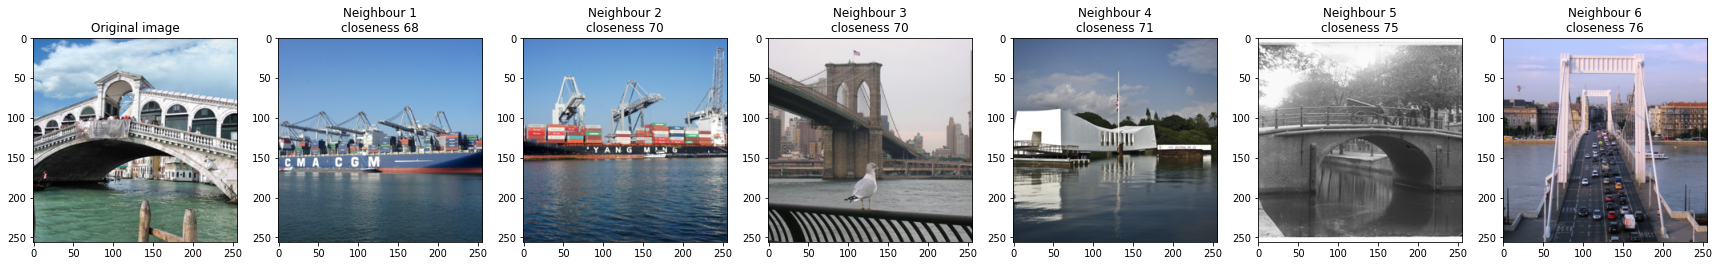

sample 10


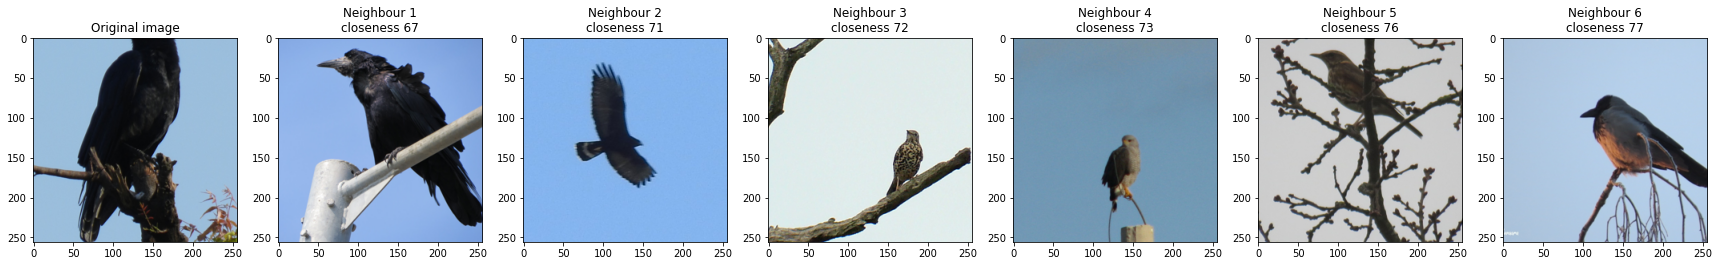

In [53]:
for index, sample_idx in enumerate(random_sample):
    print('sample', index + 1)

    neighbor_indices = indices[sample_idx]
    neighbor_distances = distances[sample_idx]

    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30,30))

    for neighbour_idx, close in enumerate(neighbor_indices):
        image_name = str(close).zfill(4)
        image = give_image(image_name)

        axes[neighbour_idx].imshow(image)

        if neighbour_idx == 0:
            axes[neighbour_idx].set_title('Original image')
        else:
            axes[neighbour_idx].set_title(f'Neighbour {neighbour_idx}\ncloseness {int(neighbor_distances[neighbour_idx])}')

    plt.show()